# **Data Cleaning**

## Objectives

* Import the Dataset
* Run the correlation studies to analyze the variables most highly correlated with 'Sale Price'

## Inputs

* The dataset is located at: outputs/datasets/collection in the root level directory

## Outputs

* Results of the correlation study 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [25]:
import os
current_dir = os.getcwd()
current_dir

'/'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [26]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [27]:
current_dir = os.getcwd()
current_dir

'/'

# Beginning of the correlation studies

In this notebook we will run correlation studies in order to answer the first business requirement which was:
* The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualizations of the correlated variables against the sale price to show that.



In [29]:
import pandas as pd
df_ohe = pd.read_csv('/workspaces/Fabrizio-Project-Five/outputs/dataset/collection/feature_engineered_dataset.csv')
df_ohe.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.000000,3.000000,706,150,0.0,548,2003.0,1710,8450,...,0,0,0,1,0,0,1,0,0,0
1,1262,0.000000,3.000000,978,284,0.0,460,1976.0,1262,9600,...,0,0,0,1,0,0,0,1,0,0
2,920,866.000000,3.000000,486,434,0.0,608,2001.0,1786,11250,...,0,0,0,1,0,0,1,0,0,0
3,961,354.706697,2.866719,216,540,0.0,642,1998.0,1717,9550,...,0,0,0,0,1,0,1,0,0,0
4,1145,354.706697,4.000000,655,490,0.0,836,2000.0,2198,14260,...,0,0,0,1,0,0,1,0,0,0
5,796,566.000000,1.000000,732,64,0.0,480,1993.0,1362,14115,...,0,0,0,0,1,0,0,1,0,0
6,1694,0.000000,3.000000,1369,317,0.0,636,2004.0,1694,10084,...,0,0,0,1,0,0,1,0,0,0
7,1107,983.000000,3.000000,859,216,0.0,484,1973.0,2090,10382,...,0,0,0,0,1,0,0,1,0,0
8,1022,752.000000,2.000000,0,952,0.0,468,1931.0,1774,6120,...,0,0,0,0,1,0,0,1,0,0
9,1077,0.000000,2.000000,851,140,0.0,205,1939.0,1077,7420,...,0,0,0,1,0,0,0,1,0,0


In [30]:
df_ohe_corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)

df_ohe_corr_spearman

OverallQual         0.808511
GrLivArea           0.730148
YearBuilt           0.646068
GarageArea          0.612761
KitchenQual_TA     -0.599837
GarageYrBlt         0.593788
TotalBsmtSF         0.587366
YearRemodAdd        0.578389
1stFlrSF            0.560320
GarageFinish_Unf   -0.501228
Name: SalePrice, dtype: float64

In the above cell we can note the ten most correlated features with the variable 'SalePrice' using the Spearman method. Now let's do the same for the Pearson method and see if we get different values

In [31]:
df_ohe_corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
df_ohe_corr_pearson

OverallQual       0.787228
GrLivArea         0.708172
GarageArea        0.608405
TotalBsmtSF       0.603583
1stFlrSF          0.594935
KitchenQual_TA   -0.526715
KitchenQual_Ex    0.513985
YearBuilt         0.507584
YearRemodAdd      0.505434
GarageYrBlt       0.486362
Name: SalePrice, dtype: float64

It is clear that we have stronger correlation levels with the 'Spearman' method. Now that we know our most correlated features we can say that:

- The price of a house increases with the increase of Overall Quality
- The price of a house increases with the increase of Ground Living Area (in square feet) when above grade
- The price of a house increases when the year of construction is more recent
- The price of a house increases with the increase of Garage Area
- The price of a house increases when the Kitchen Quality is NOT assesed as Typical/Average
- The price of a house increases when the year of construction of the garage is more recent
- The price of a house increases when the basement surface (measured in square feet) increases
- The price of a house increases when the year of remodelling is more recent
- The price of a house increases when the surface area of the 1st floor (measured in square feet) increases
- The price of a house increases when the state of the garage is NOT unfinished

In [32]:
df_ohe.filter(df_ohe_corr_spearman.index) 

,OverallQual,GrLivArea,YearBuilt,GarageArea,KitchenQual_TA,GarageYrBlt,TotalBsmtSF,YearRemodAdd,1stFlrSF,GarageFinish_Unf
0,7,1710,2003,548,0,2003.0,856,2003,856,0
1,6,1262,1976,460,1,1976.0,1262,1976,1262,0
2,7,1786,2001,608,0,2001.0,920,2002,920,0
3,7,1717,1915,642,0,1998.0,756,1970,961,1
4,8,2198,2000,836,0,2000.0,1145,2000,1145,0
...,...,...,...,...,...,...,...,...,...,...
1374,6,1647,1999,460,1,1999.0,953,2000,953,0
1375,6,2073,1978,500,1,1978.0,1542,1988,2073,1
1376,7,2340,1941,252,0,1941.0,1152,2006,1188,0
1377,5,1078,1950,240,0,1950.0,1078,1996,1078,1


In order to fully answer the first business requirement (which was information on correlation levels with our target variable 'SalePrice' and data visualization for these levels) we need to display some plots that will help us understand this correlation significance on a visual level

---

Heat map as a first plot will help us significantly in visualize the correlation levels.

In [33]:
df_spearman_corr = df_ohe.corr(method='spearman')
df_spearman_corr

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
1stFlrSF,1.000000,-0.298626,0.105040,0.322573,0.219311,-0.003439,0.476981,0.230299,0.472878,0.426981,...,-0.041504,0.015094,-0.004049,0.107603,-0.226592,0.157017,0.142953,-0.264594,0.284958,-0.088170
2ndFlrSF,-0.298626,1.000000,0.442959,-0.187688,0.044673,0.038003,0.078121,0.067692,0.619475,0.113809,...,-0.077236,-0.060177,-0.004684,0.007939,-0.105338,0.117355,0.149831,-0.160736,0.028415,-0.007115
BedroomAbvGr,0.105040,0.442959,1.000000,-0.078483,0.118376,0.018314,0.101068,-0.046653,0.489765,0.301656,...,-0.004095,-0.001562,-0.007457,0.017425,-0.037399,0.026269,0.027848,-0.008468,-0.012642,-0.047940
BsmtFinSF1,0.322573,-0.187688,-0.078483,1.000000,-0.581881,-0.020377,0.224765,0.078935,0.052562,0.161062,...,0.110049,-0.165101,0.002456,0.044643,-0.134456,0.113418,0.009115,-0.067611,0.160150,-0.090616
BsmtUnfSF,0.219311,0.044673,0.118376,-0.581881,1.000000,-0.006349,0.111046,0.192027,0.241002,0.067678,...,-0.141728,-0.217821,-0.093715,0.060404,-0.090764,0.044655,0.150468,-0.198179,0.084309,0.023797
EnclosedPorch,-0.003439,0.038003,0.018314,-0.020377,-0.006349,1.000000,-0.007424,-0.076120,0.023801,0.017401,...,0.009230,-0.015180,0.037687,0.007328,0.044248,-0.060537,-0.002172,-0.004414,-0.005138,0.035166
GarageArea,0.476981,0.078121,0.101068,0.224765,0.111046,-0.007424,1.000000,0.591889,0.453954,0.343018,...,-0.155653,-0.032560,-0.103667,0.190739,-0.325047,0.186889,0.280592,-0.392691,0.282730,-0.113811
GarageYrBlt,0.230299,0.067692,-0.046653,0.078935,0.192027,-0.076120,0.591889,1.000000,0.281306,0.041796,...,-0.233123,-0.081662,-0.158455,0.203039,-0.456894,0.331287,0.447302,-0.538312,0.268808,-0.159259
GrLivArea,0.472878,0.619475,0.489765,0.052562,0.241002,0.023801,0.453954,0.281306,1.000000,0.444442,...,-0.124305,-0.049385,-0.008931,0.097635,-0.298396,0.253224,0.269388,-0.382958,0.264560,-0.073014
LotArea,0.426981,0.113809,0.301656,0.161062,0.067678,0.017401,0.343018,0.041796,0.444442,1.000000,...,0.036534,-0.017729,-0.028692,0.061009,-0.167338,0.135412,0.009242,-0.097756,0.184874,-0.024433


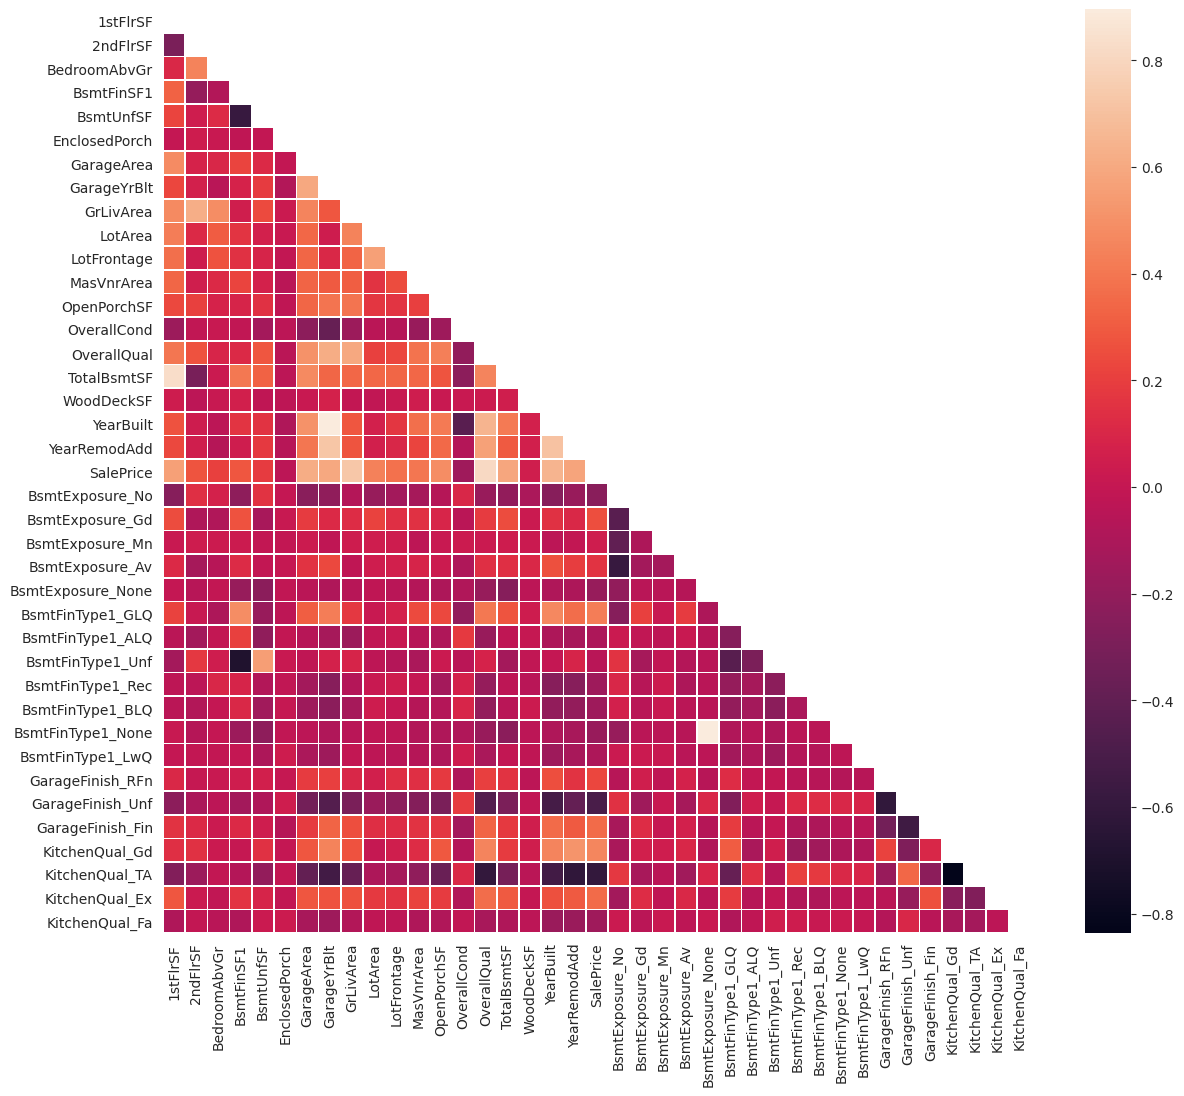

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(df_spearman_corr, dtype=bool)) # code taken from seaborn docs
sns.heatmap(df_spearman_corr,linewidths=.5, mask=mask)
plt.savefig('/workspaces/Fabrizio-Project-Five/outputs/images/correlation')

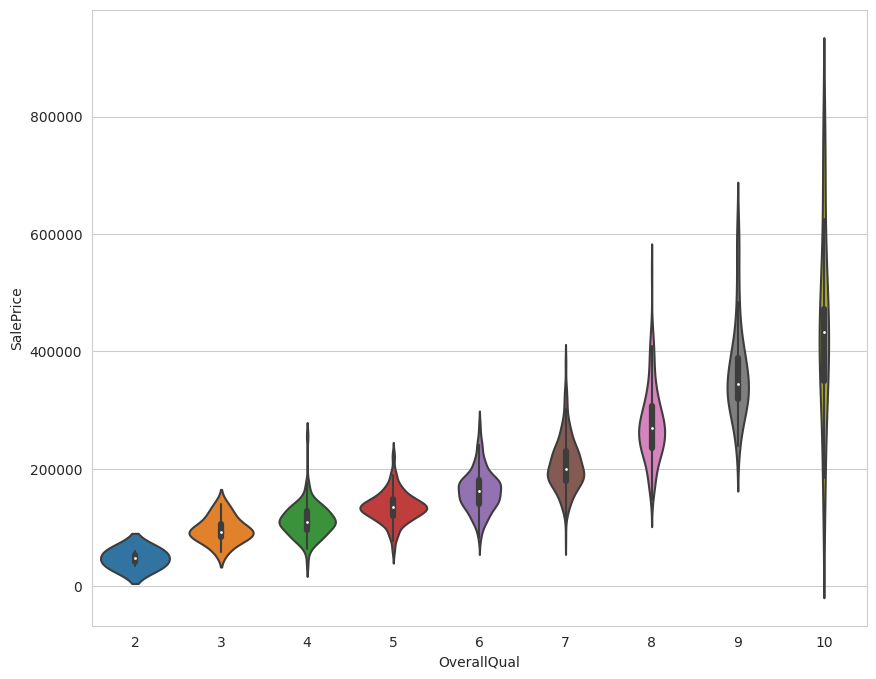

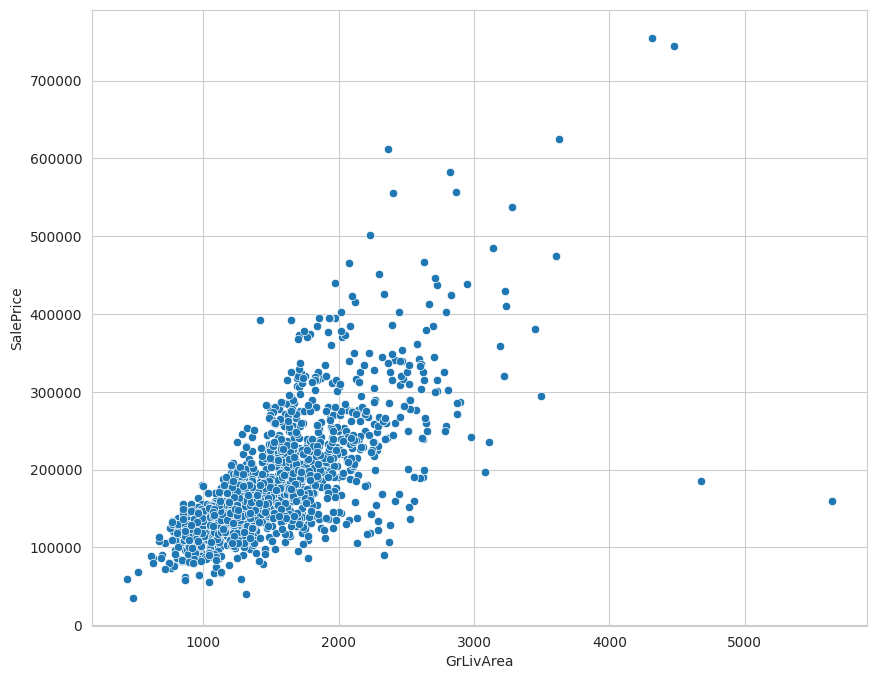

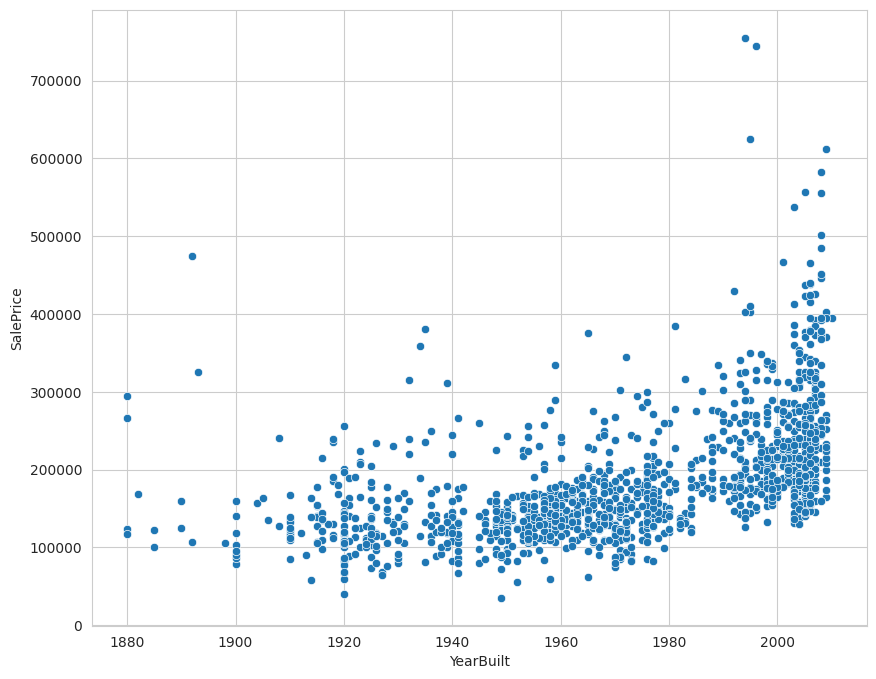

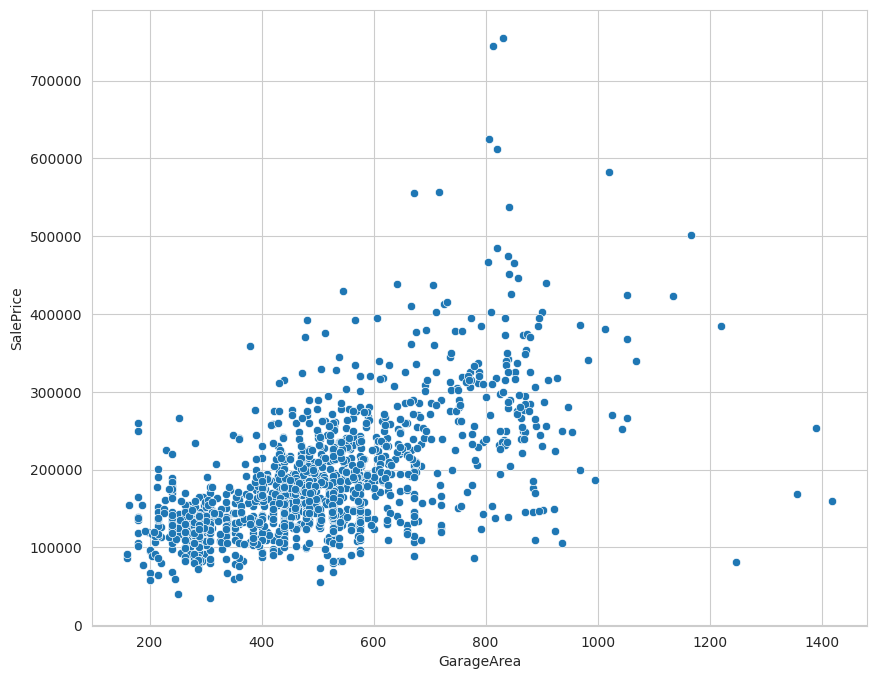

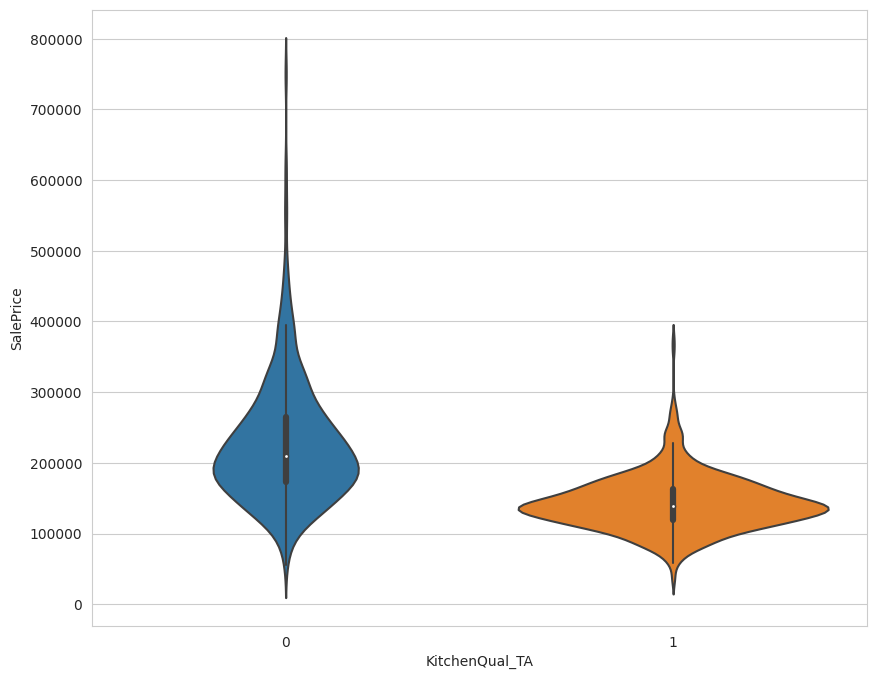

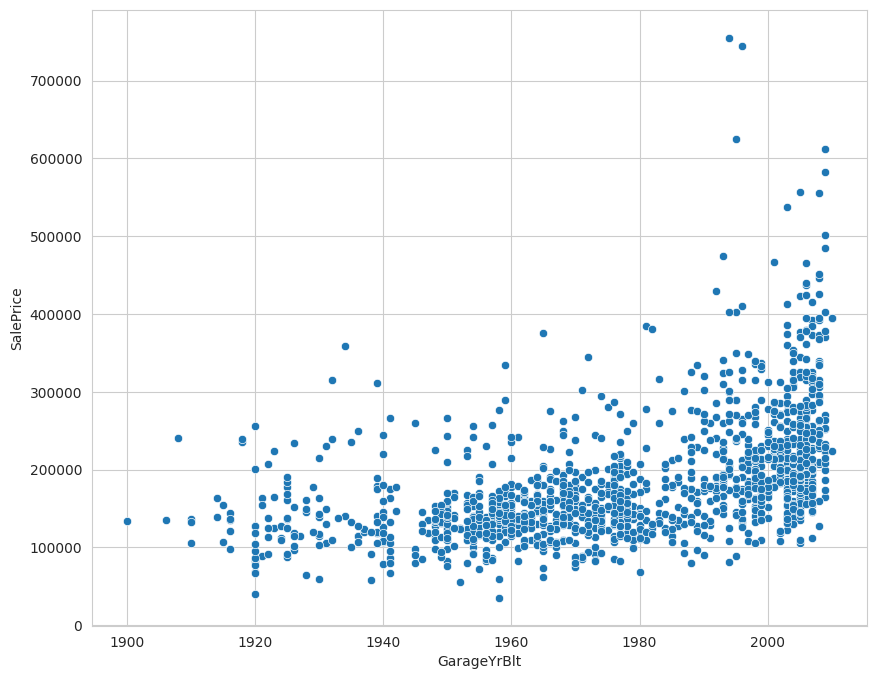

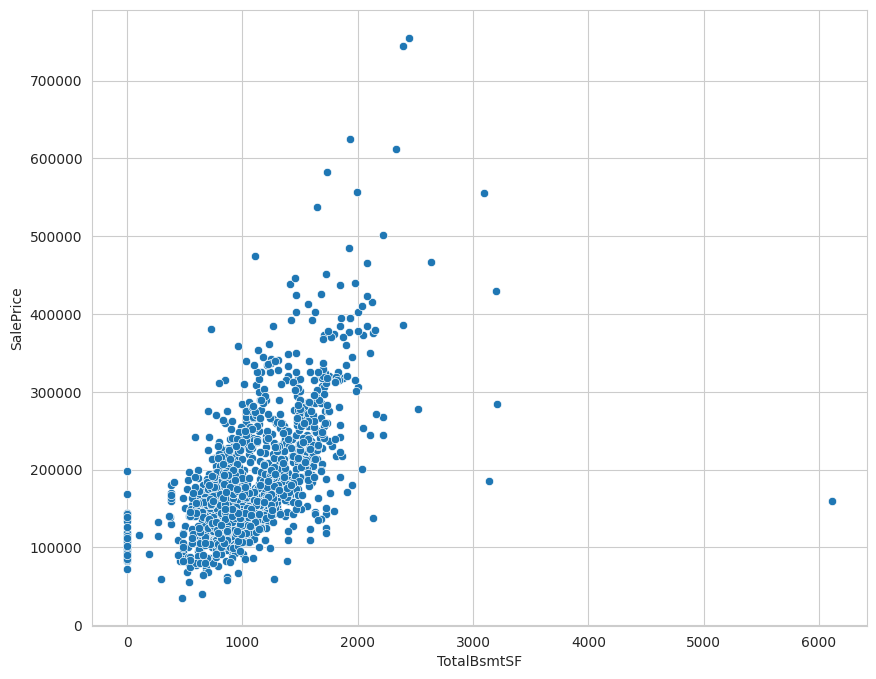

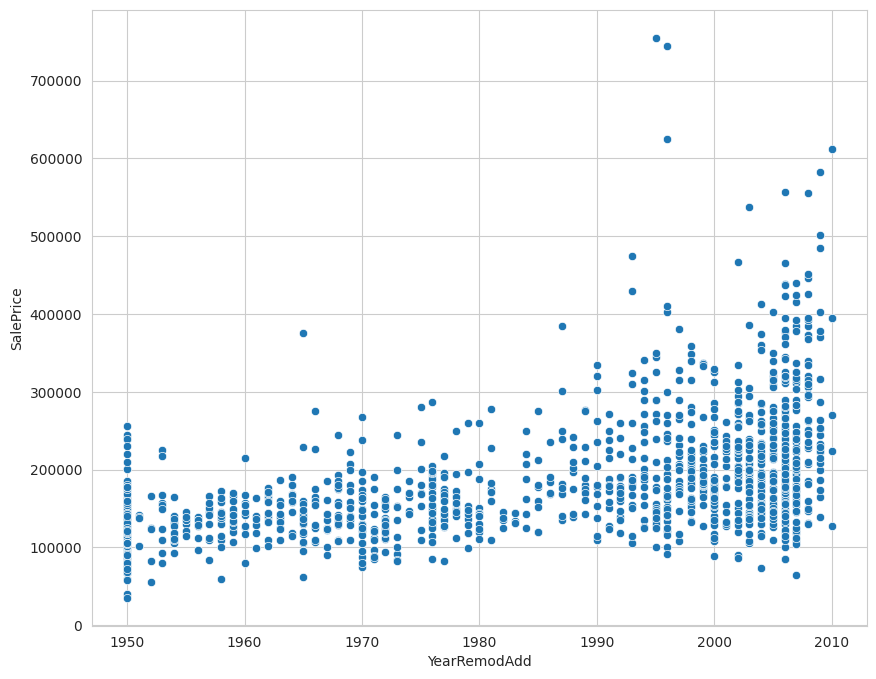

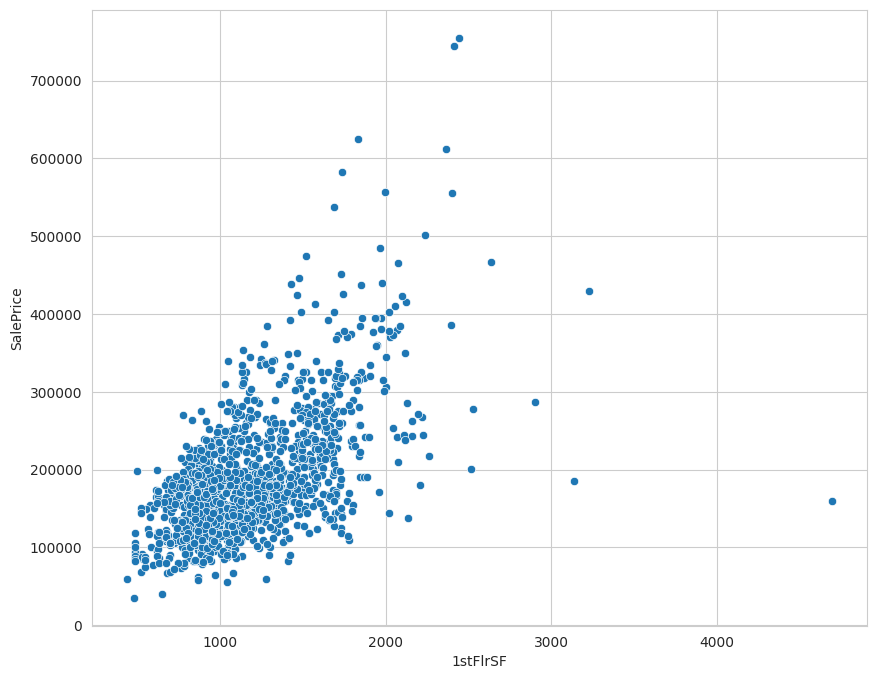

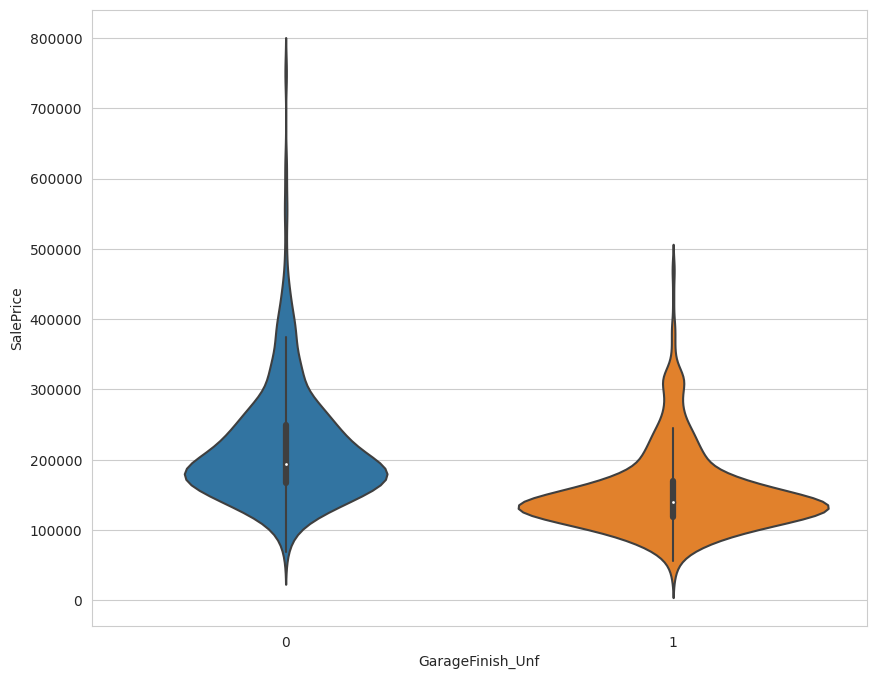

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
This function will create plot for the 10 most correlated variables with 'SalePrice'
"""

def corr_plots_saleprice(df, target_var):
    for col in target_var:
        if col in ['OverallQual', 'KitchenQual_TA', 'GarageFinish_Unf']:
            plt.figure(figsize=(10, 8))
            sns.violinplot(y=df['SalePrice'], x=df_ohe[col])
            plt.savefig(f'/workspaces/Fabrizio-Project-Five/outputs/images/correlation')
        else:
            plt.figure(figsize=(10, 8))
            sns.scatterplot(y=df['SalePrice'], x=df_ohe[col])
            plt.savefig(f'/workspaces/Fabrizio-Project-Five/outputs/images/correlation')

corr_plots_saleprice(df_ohe, df_ohe_corr_spearman.index.to_list())


The plots shown above show us the distribution of the values for the most correlated values agianst 'Sale Price'. 
This allows us to draw stronger conclusions and have a firmer base for the rationale behind the selling price.

---

Now that we have plots to show correlation levels we could generate some reports using the predictive power score library to investigate any potential non linear relationship.

In [38]:
import ppscore as pps
df = pd.read_csv('/workspaces/Fabrizio-Project-Five/inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv')
pps.matrix(df=df)

/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,1stFlrSF,1stFlrSF,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,1stFlrSF,2ndFlrSF,0.000000,regression,True,mean absolute error,348.524017,361.733503,DecisionTreeRegressor()
2,1stFlrSF,BedroomAbvGr,0.000000,regression,True,mean absolute error,0.520206,0.710870,DecisionTreeRegressor()
3,1stFlrSF,BsmtExposure,0.000000,classification,True,weighted F1,0.515591,0.505074,DecisionTreeClassifier()
4,1stFlrSF,BsmtFinSF1,0.000000,regression,True,mean absolute error,364.535616,393.198612,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
571,SalePrice,TotalBsmtSF,0.022821,regression,True,mean absolute error,317.032192,309.797281,DecisionTreeRegressor()
572,SalePrice,WoodDeckSF,0.000000,regression,True,mean absolute error,103.741935,124.116397,DecisionTreeRegressor()
573,SalePrice,YearBuilt,0.140960,regression,True,mean absolute error,25.041781,21.511900,DecisionTreeRegressor()
574,SalePrice,YearRemodAdd,0.135239,regression,True,mean absolute error,17.857534,15.442495,DecisionTreeRegressor()


Let's check these scores in a heat map

/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/home/codeany/.local

<AxesSubplot:xlabel='x', ylabel='y'>

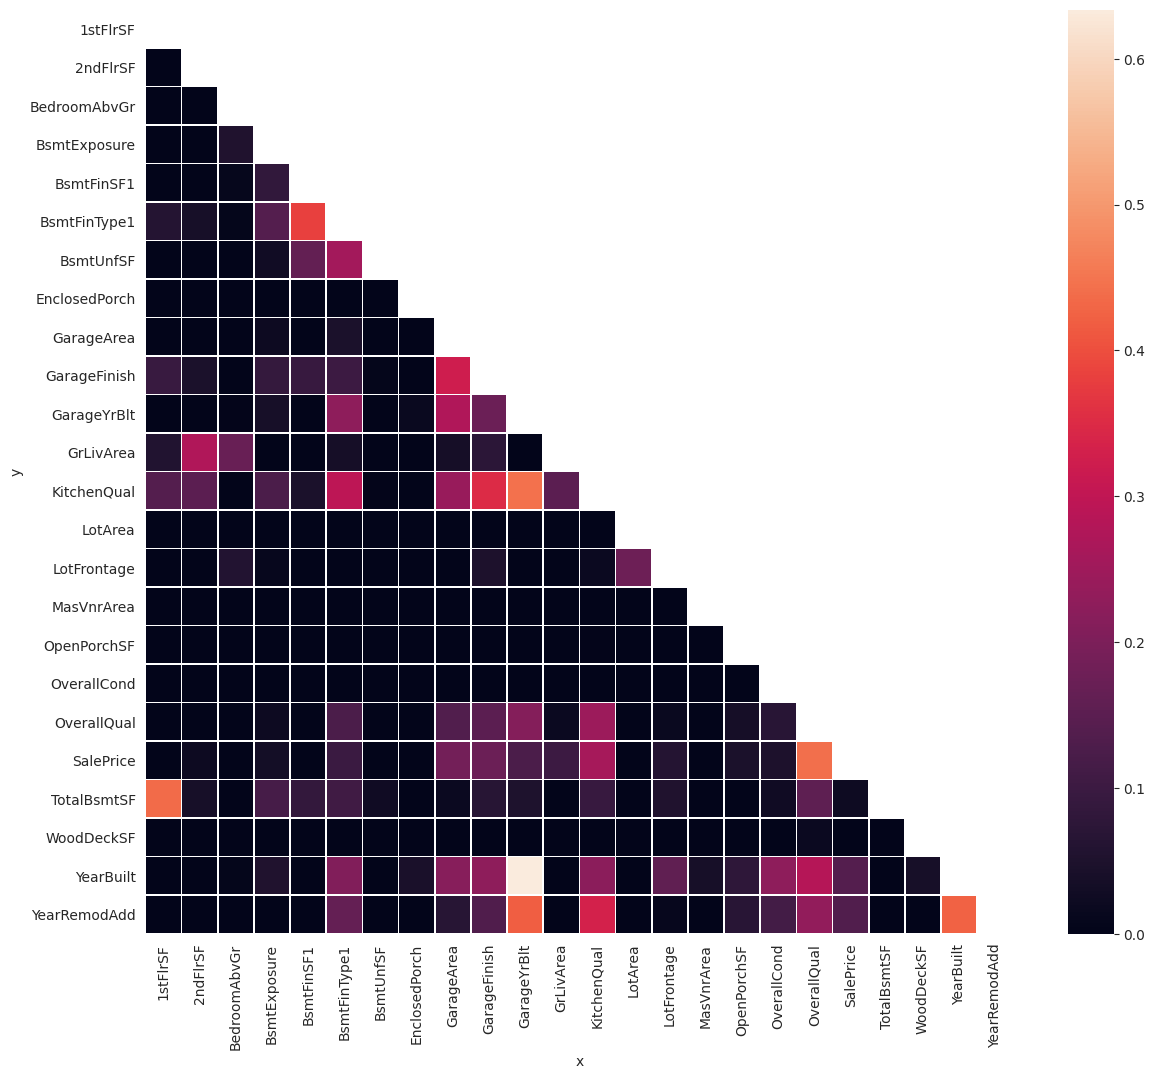

In [42]:

# code taken from the CI lesson on PPS
pps_matrix_raw = pps.matrix(df)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
mask = np.triu(np.ones_like(pps_matrix, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(data=pps_matrix, linewidths=0.5, mask=mask )


As we can see from the heatmap we get some confirmation regarding our previous correlation study.
On the Y axis when we analize 'SalePrice' we notice that the values which have a stronger predictive score are:
* Overall Quality
* Kitchen Quality
* Year Built
* Garage Area
* Year Remodel Add (Year Remodel Date)

Of these only the first two have levels of significant importance for the predictive score (above 0.2). This confirms our initial standard correlation analysis given the fact that after some feature engineer steps two of the most highly correlated variables in the dataset were 'Overall Quality' and 'Kitchen Quality TA' where TA stands for Typical/Average.

### Final conclusions

In our correlation studies we were able to define the variables mostly correlated with our target 'Sale Price'. Conclusively there is only one variable which alone has the strongest correlation, and that is 'Overall Quality'. From a logic standpoint is quite obvious but some other things we might want to consider is that other factors, when summed up together, might play a significant role in determining the appropriate price range for a given house.

Even without a ML pipeline our friend Lydia Doe would still be able to set the price of her inherited houses to a profitable yet competitive range.

Now let's move to our next notebook where we will proceed with the ML pipeline steps.